
Frequency of top 10 selling items: 

Coffee           5471
Bread            3325
Tea              1435
Cake             1025
Pastry            856
Sandwich          771
Medialuna         616
Hot chocolate     590
Cookies           540
Brownie           379
Name: Item, dtype: int64


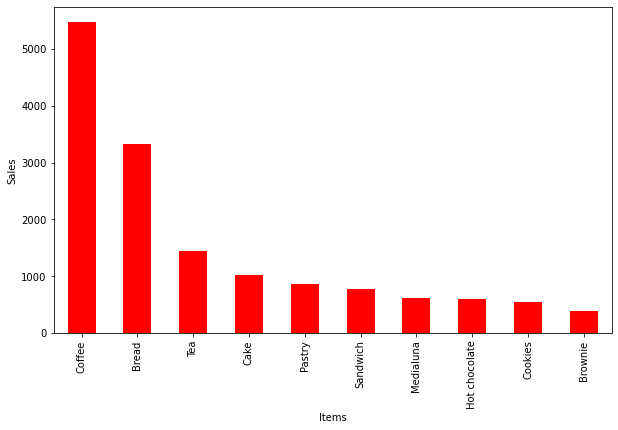

In [23]:
#Shubham Chand 180022
# Section A
# Answer : 1
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10, 6]
plt.xlabel("Items")
plt.ylabel("Sales")

data = pd.read_csv("BreadBasket_DMS.csv") 

#Now we will firstchange index to item to sort items into new datasets without 'NONE' type of Items.
items = data.set_index(['Item'])
NewItems= items.drop(['NONE'])
NewItems.reset_index(inplace = True)

#after reseting the index, we will count the items and print the frequency of top 10 selling items.
Top=NewItems['Item'].value_counts()
print("\nFrequency of top 10 selling items: \n")
print(Top.head(10))

Top.head(10).plot(kind='bar', color='red')
plt.show()


Top 5 Items sold in 2016: 

Coffee       2214
Bread        1390
Tea           577
Pastry        366
Medialuna     362
Name: Item, dtype: int64


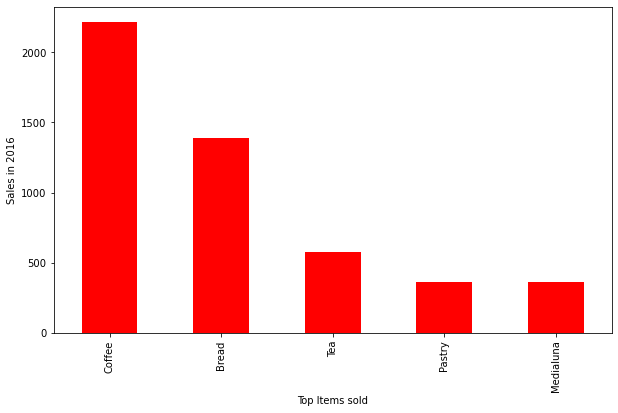

In [24]:
# Answer : 2
data['Date'] = pd.to_datetime(data['Date'],format='%d-%m-%Y', errors='coerce')
data['year'] = data['Date'].dt.year
items = data.set_index(['Item'])
NewItems= items.drop(['NONE'])
NewItems.reset_index(inplace = True)

lol= NewItems.loc[NewItems['year'] == 2016]

popular=lol['Item'].value_counts()
print("Top 5 Items sold in 2016: \n")
print(popular.head())

popular.head().plot(kind='bar', color='red')
plt.xlabel("Top Items sold")
plt.ylabel("Sales in 2016")

plt.show()

Top 5 Items sold in 2017: 

Coffee      3257
Bread       1935
Tea          858
Cake         762
Sandwich     536
Name: Item, dtype: int64


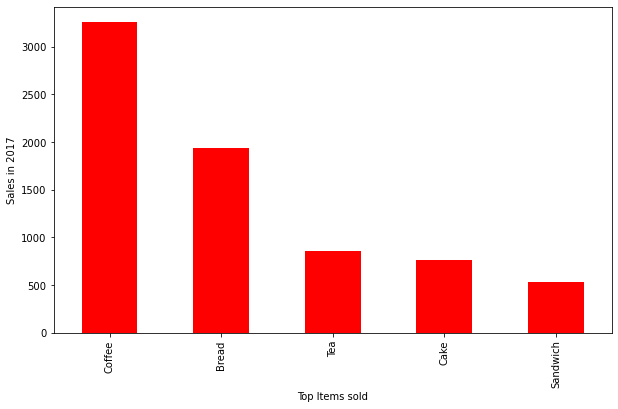

In [25]:
# Answer : 3
lol= NewItems.loc[NewItems['year'] == 2017]
popular=lol['Item'].value_counts()
print("Top 5 Items sold in 2017: \n")
print(popular.head())

popular.head().plot(kind='bar', color='red')
plt.xlabel("Top Items sold")
plt.ylabel("Sales in 2017")

plt.show()

Five most popular items sold on Monday


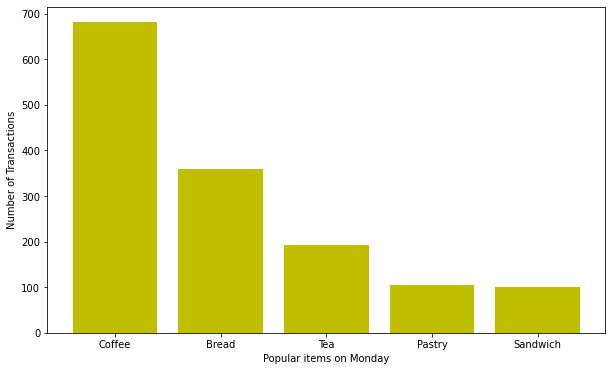

5 most popular items sold on monday is: 
           Date      Time  Transaction     Item  year  Weekday
180 2016-10-31  08:28:31           81   Coffee  2016        0
181 2016-10-31  08:28:31           81     Cake  2016        0
182 2016-10-31  08:47:05           82  Tartine  2016        0
183 2016-10-31  08:47:05           82     NONE  2016        0
184 2016-10-31  08:47:05           82    Bread  2016        0


In [26]:
# Answer : 4
def map_indexes_and_values(df, col):
    df_col = df[col].value_counts()
    x = df_col.index.tolist()
    y = df_col.values.tolist()
    return x, y

data['Weekday'] = data['Date'].dt.weekday
print("Five most popular items sold on Monday")
monday_info = data[data['Weekday'] == 0]
item, item_count = map_indexes_and_values(monday_info, 'Item')
plt.bar(item[:5], item_count[:5], color='y', label='Monday')
plt.xlabel('Popular items on Monday')
plt.ylabel('Number of Transactions')
plt.show()
print("5 most popular items sold on monday is:","\n", monday_info[:5])

January     3509
Febrary     3991
March       4041
April       1191
October      385
November    4607
December    3569
Name: month, dtype: int64

The number of average transactions per month: 3041.8571428571427


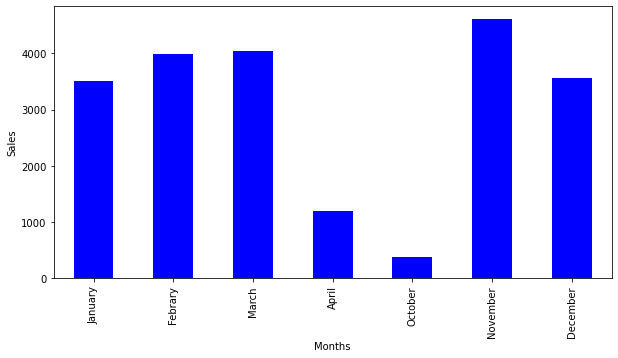

In [27]:
# Answer : 5
plt.rcParams["figure.figsize"] = [10, 5]
plt.xlabel("Months")
plt.ylabel("Sales")

data['month'] = data['Date'].dt.month
sales=data['month'].value_counts()
new= sales.sort_index()

renamed= new.rename(index={1:'January',2:'Febrary', 3:'March',4: 'April', 5:'May', 6:'June', 7: 'July',8:'August', 9:'September',10: 'October', 11:'November', 12:'December'})


print(renamed)


average=renamed.sum()/7
print("\nThe number of average transactions per month: " + str(average))

renamed.plot(kind='bar', color='blue')
plt.show()

Monday       2394
Tuesday      2480
Wednesday    2429
Thursday     2719
Friday       3235
Saturday     4803
Sunday       3233
Name: weekday, dtype: int64
The number of average transactions per weekday: 3041.8571428571427


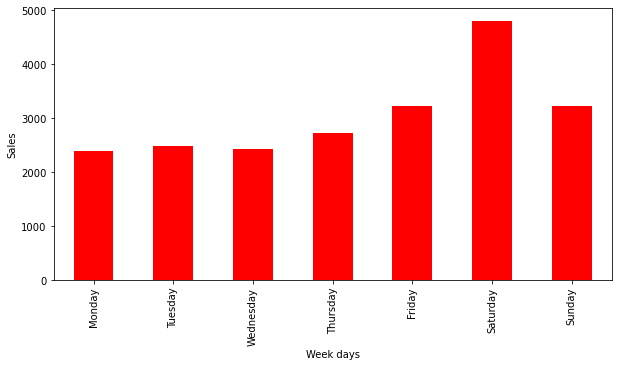

In [28]:
# Answer : 6
data['weekday'] = data['Date'].dt.weekday
sales=data['weekday'].value_counts()
new= sales.sort_index()
renamed= new.rename(index={0:'Monday',1:'Tuesday', 2:'Wednesday',3: 'Thursday', 4:'Friday', 5:'Saturday', 6: 'Sunday'})

print(renamed)

average=renamed.sum()/7
print("The number of average transactions per weekday: " + str(average))

renamed.plot(kind='bar', color='red')
plt.xlabel("Week days")
plt.ylabel("Sales")

plt.show()

The number of transactions per hour


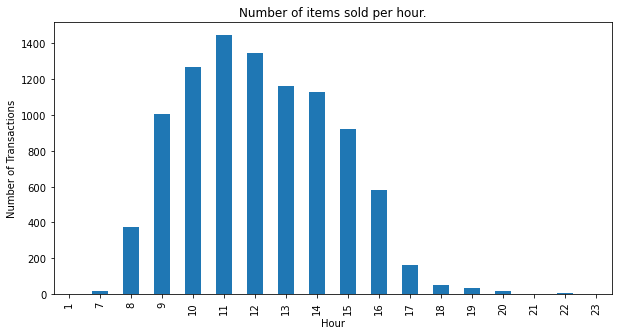

In [31]:
# Answer : 7
data['Time'] = pd.to_datetime(data['Time'])
data['Hour'] = data['Time'].dt.hour
print("The number of transactions per hour")
data.groupby('Hour')['Transaction'].nunique().plot(kind='bar', title='Number of items sold per hour.')
plt.xlabel('Hour')
plt.ylabel('Number of Transactions')
plt.show()

The best item combinations with coffee


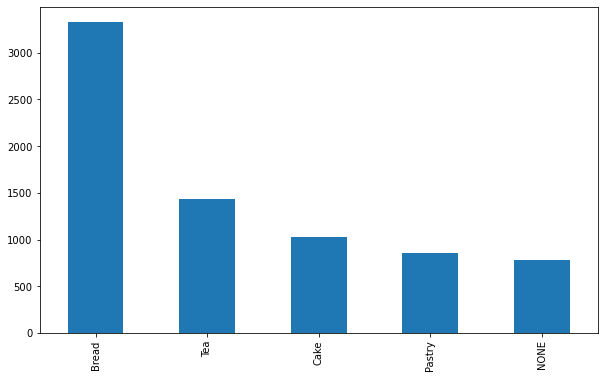

In [33]:
# Answer : 8
def coffee_ext(group):
    match = group['Item'].str.contains('Coffee')
    return data.loc[match]
coffee = data[ data['Item'].str.contains('Coffee')]['Transaction'].unique()
coffee = pd.DataFrame(coffee,columns=['Transaction'])
coffee_m = coffee.merge(data, left_on='Transaction',right_on='Transaction',how='right')
coffee_m = coffee_m[~coffee_m.Item.str.contains('Coffee')]['Item'].value_counts()

print("The best item combinations with coffee")
plt.figure(figsize=(10,6))
coffee_m[:5].plot(kind='bar')
plt.show()

The five most Coffee Sales day in 2017
2017-02-04    72
2017-02-26    57
2017-03-04    57
2017-01-28    56
2017-01-07    55
Name: Date, dtype: int64


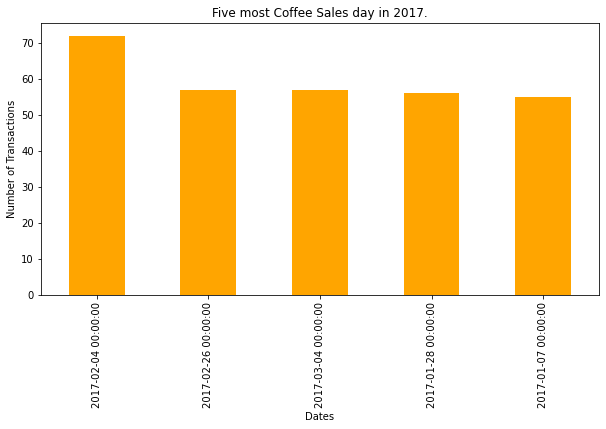

In [34]:
# Answer : 9
print("The five most Coffee Sales day in 2017")
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y', errors='coerce')
data['year'] = data['Date'].dt.year
yearsetup=data.loc[data['year']==2017]
coffee=yearsetup.set_index(['Item'])
onlycoffee=coffee.loc['Coffee']
onlycoffee.reset_index(inplace=True)
popular=onlycoffee['Date'].value_counts()
print(popular.head())
popular.head().plot(kind='bar', color='orange')
plt.xlabel('Dates')
plt.ylabel('Number of Transactions')
plt.title('Five most Coffee Sales day in 2017.')
plt.show()


Breads sold per weekday: 

Monday       2394
Tuesday      2480
Wednesday    2429
Thursday     2719
Friday       3235
Saturday     4803
Sunday       3233
Name: weekday, dtype: int64

The number of average transactions of bread per weekday: 3041.8571428571427



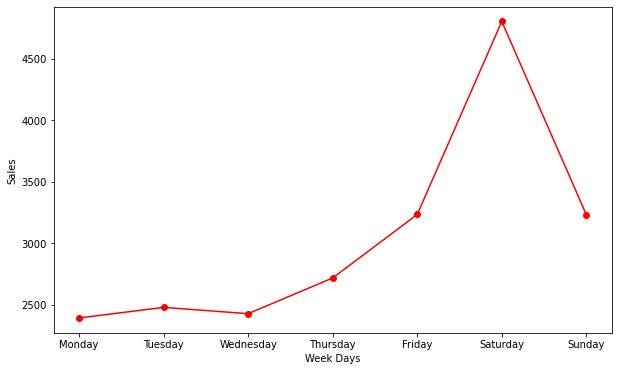

In [41]:
# Answer : 10
plt.rcParams["figure.figsize"] = [10, 6]
plt.xlabel("Week Days")
plt.ylabel("Sales")

bread= data['Item']== 'Bread'
breaddata= data[bread]
sales=data['weekday'].value_counts()

new= sales.sort_index()
renamed= new.rename(index={0:'Monday',1:'Tuesday', 2:'Wednesday',3: 'Thursday', 4:'Friday', 5:'Saturday', 6: 'Sunday'})

print("\nBreads sold per weekday: \n")

print(renamed)
average=renamed.sum()/7
print("\nThe number of average transactions of bread per weekday: " + str(average)+ "\n")

renamed.plot(kind='line', color='red', marker='o')

plt.show()